<a href="https://colab.research.google.com/github/ZgankMiha/Spsd21_Portfolio_MZ/blob/main/SDSPhD2021_Portfolio_MihaZgank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<strong>Portfolio exercise 1 - unsupervised ML - clustering</strong>
Monday, 2021-11-22

Packages for machine learning:
Scikit-learn: https://scikit-learn.org/stable/

Clustering is an unsupervised learning problem, it allows identifying natural grouping in data. It allows discovery of degrees of similarity between individual objects being clustered.


Imported packages:

In [ ]:
import pandas as pd                                     #pandas
import numpy as np                                      #numpy
from matplotlib import pyplot as plt                    #matplotlib
from sklearn.cluster import AgglomerativeClustering     #Scikit-learn
from scipy.cluster.hierarchy import dendrogram, linkage #Scipy
from sklearn import metrics                             #Scikit-learn 
from sklearn.metrics import davies_bouldin_score        #Scikit-learn 

In [ ]:
!wget https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv

In [ ]:
val99 = pd.read_csv('value99.csv')
val99 = val99.replace('\.+', np.nan, regex=True)
val99.dropna(inplace=True)

val99.head(10)

val_set = val99.loc[:,'v7':'v61']
val_set.head()

#importance = {'v56':'arbejde','v57':'familie','v58':'venener','v59':'fritid', 'v60':'politik', 'v61':religion'}

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61
1,1,1,2,0,1,1,2,2,1,1
2,1,1,2,0,1,1,1,1,1,2
7,1,1,2,0,1,1,2,1,3,4
9,1,1,1,1,1,1,1,2,2,3
10,1,1,2,0,1,2,2,3,1,4


In [ ]:
X = val_set.loc[:, 'v57':'v61']
X_1 = val_set.loc[:, 'v57':'v61']


not_cluster_set=val_set.loc[:,'v7':'v14']
linked = linkage(X, 'ward')


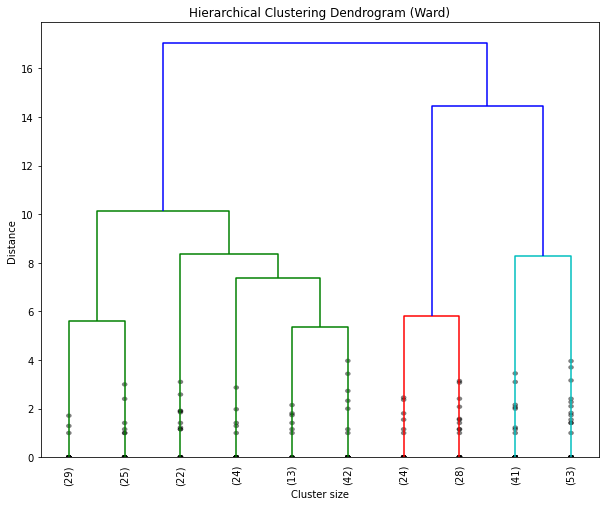

In [ ]:
figure = plt.figure(figsize=(10, 8))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [ ]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    val_set['cluster'+k] = labels

Cluster count- 2 |  db score- 1.8 |  ch score -  79.93 |  ss score -  0.21
Cluster count- 3 |  db score- 1.5 |  ch score -  84.67 |  ss score -  0.23
Cluster count- 4 |  db score- 1.52 |  ch score -  76.8 |  ss score -  0.22
Cluster count- 5 |  db score- 1.52 |  ch score -  70.46 |  ss score -  0.23
Cluster count- 6 |  db score- 1.48 |  ch score -  68.59 |  ss score -  0.24
Cluster count- 7 |  db score- 1.41 |  ch score -  66.83 |  ss score -  0.26
Cluster count- 8 |  db score- 1.43 |  ch score -  63.19 |  ss score -  0.27
Cluster count- 9 |  db score- 1.37 |  ch score -  60.66 |  ss score -  0.27
Cluster count- 10 |  db score- 1.36 |  ch score -  58.82 |  ss score -  0.28


**note:**

Davies Bouldin Score (db) → as low as possible

Calinski-Harabasz (ch) → as high as possible

Silhouette-score (ss) → is a -1 to +1 thing. 0 is bad while values closer to the edges are better.

In [ ]:
X_1=val_set[['cluster','v7',	'v9','v10','v14','v56','v57','v58','v59','v60','v61']]
X_1.head()

KeyError: ignored

In [ ]:
stuff=X_1.groupby(['cluster']).mean()
trans_stuff=stuff.T
ts=round(trans_stuff,2)
print(ts)
count=val_set.groupby(['cluster'])['v7'].count()
print(count)
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
        linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=2,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

# <strong>Portfolio exercise 2 - supervised ML - categorisation and regression</strong>
Tuesday, 2021-11-23

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBRegressor

sns.set(style="darkgrid", color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
turnover = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv')
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
turn = pd.get_dummies(turnover)

In [ ]:
turn.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.082472,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.275092,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


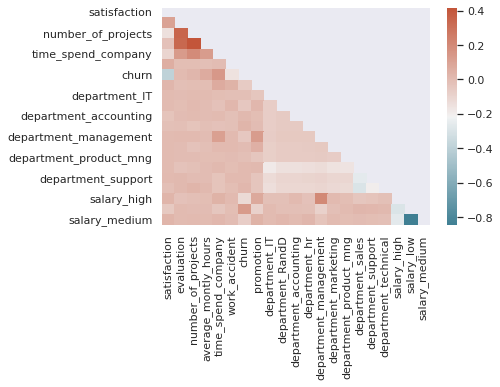

In [ ]:
corr = turn.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap=cmap)

Checking how well the model predicted the `churn`

Predicting `churn` using a classification pipeline

In [ ]:
X = turn.loc[:, turn.columns!='churn']
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
y = turn.iloc[:, 6]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.783

In [ ]:
true_churn = labelencoder_y.inverse_transform(y_test)
predicted_churn = labelencoder_y.inverse_transform(model.predict(X_test))

In [ ]:
df = pd.DataFrame({'true_churn': true_churn, 'predicted_churn': predicted_churn}) 

pd.crosstab(df.true_churn, df.predicted_churn)

predicted_churn,0,1
true_churn,,
0,2116,168
1,483,233


In [ ]:
print(classification_report(true_churn,predicted_churn, labels=labelencoder_y.classes_))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2284
           1       0.58      0.33      0.42       716

    accuracy                           0.78      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



In [ ]:
y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2116,  168],
       [ 483,  233]])

Text(0.5, 257.44, 'Predicted label')

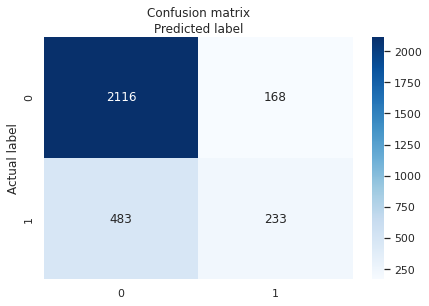

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Blues",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Regression - Predicting the number of weekly average hours worked

In [ ]:
turn['average_weekly_hours'] = turn['average_montly_hours'] / 4.345
turn.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,average_weekly_hours
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,36.133487
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,60.299194
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,62.600690
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,51.323360
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,36.593786


In [ ]:
y = turn['average_weekly_hours']

In [ ]:
# X = turn[['satisfaction', 'evaluation',	'number_of_projects', 'satisfaction',	'number_of_projects']]
# X.head()

In [ ]:
X = pd.concat([turn.iloc[:,:3],turn.iloc[:,4]],axis=1)
X.head()

,satisfaction,evaluation,number_of_projects,time_spend_company
0,0.38,0.53,2,3
1,0.80,0.86,5,6
2,0.11,0.88,7,4
3,0.72,0.87,5,5
4,0.37,0.52,2,3


In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [ ]:
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

[11:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))
print('Model XGB' + ' ' + str(model_xgb.score(X_test, y_test)))

Model OLS 0.2082364868703095
Model EL 0.18429124680583397
Model RF 0.29971798549218787
Model XGB 0.3120442784471602


In [ ]:
print('Model OLS' + ' ' + str(model_ols.score(X_train, y_train)))
print('Model EL' + ' ' + str(model_el.score(X_train, y_train)))
print('Model RF' + ' ' + str(model_rf.score(X_train, y_train)))
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

Model OLS 0.22041071843268245
Model EL 0.19261129325886783
Model RF 0.8670179093076683
Model XGB 0.353396698630265


In [ ]:
y_pred_ols = model_ols.predict(X_test)
y_pred_el = model_el.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


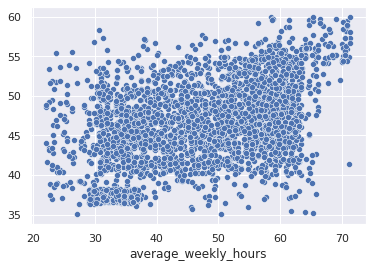

In [ ]:
sns.scatterplot(y_test, y_pred_ols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


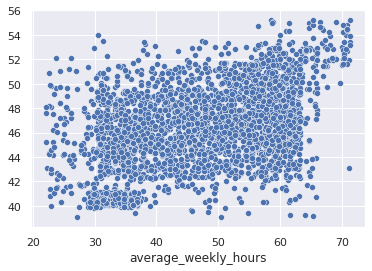

In [ ]:
sns.scatterplot(y_test, y_pred_el)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


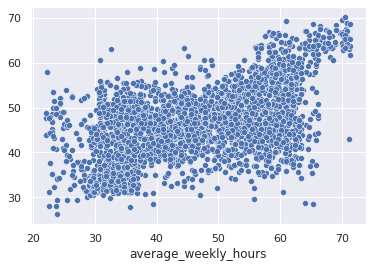

In [ ]:
sns.scatterplot(y_test, y_pred_rf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


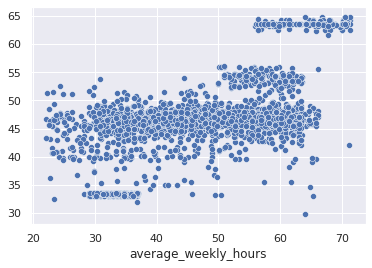

In [ ]:
sns.scatterplot(y_test, y_pred_xgb)

#**Portfolio exercise 3 - Geodata**
Wednesday, 2021-11-24

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)
!pip install adjustText # Adjusting text in maps

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip"
!unzip NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

In [ ]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
eu = gdp.read_file("NUTS_RG_20M_2021_3035_LEVL_2.shp")
eu.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ05,2,CZ,Severovýchod,Severovýchod,0.0,NaN,0,CZ05,"POLYGON ((4710986.851 3088955.848, 4729795.896..."
1,CZ06,2,CZ,Jihovýchod,Jihovýchod,0.0,NaN,0,CZ06,"POLYGON ((4715869.727 2986862.871, 4782782.205..."
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,NaN,0,CZ07,"POLYGON ((4929608.184 2955255.716, 4924768.599..."
3,CZ08,2,CZ,Moravskoslezsko,Moravskoslezsko,0.0,NaN,0,CZ08,"POLYGON ((4895030.487 3026304.289, 4917489.492..."
4,DE11,2,DE,Stuttgart,Stuttgart,0.0,NaN,0,DE11,"POLYGON ((4327060.365 2936754.230, 4329577.592..."


In [ ]:
excl_1 = ['AL','ME','MK','RS','TR']
excl_2 = ['FRY1','FRY2','FRY3','FRY4','FRY5','PT20','PT30','ES70','NO0B']

eu = eu[~eu.CNTR_CODE.isin(excl_1)]
eu = eu[~eu.NUTS_ID.isin(excl_2)]

eu.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ05,2,CZ,Severovýchod,Severovýchod,0.0,NaN,0,CZ05,"POLYGON ((4710986.851 3088955.848, 4729795.896..."
1,CZ06,2,CZ,Jihovýchod,Jihovýchod,0.0,NaN,0,CZ06,"POLYGON ((4715869.727 2986862.871, 4782782.205..."
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,NaN,0,CZ07,"POLYGON ((4929608.184 2955255.716, 4924768.599..."
3,CZ08,2,CZ,Moravskoslezsko,Moravskoslezsko,0.0,NaN,0,CZ08,"POLYGON ((4895030.487 3026304.289, 4917489.492..."
4,DE11,2,DE,Stuttgart,Stuttgart,0.0,NaN,0,DE11,"POLYGON ((4327060.365 2936754.230, 4329577.592..."


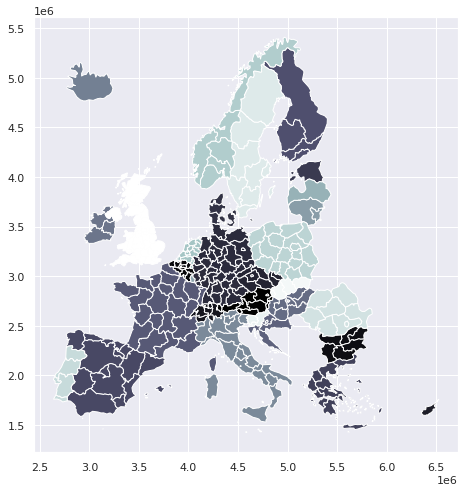

In [ ]:
eu.plot(cmap='bone', column='CNTR_CODE',figsize=(8,8))

Data on poverty risk by EU NUTS_2 regions
(https://ec.europa.eu/eurostat/web/products-datasets/-/tgs00103)

In [47]:
risk = pd.read_excel('/content/EU_data_Poverty_Risk.xlsx')
risk.head()

,NUTS_name,risk
0,Severozapaden,31.7
1,Severen tsentralen,23.7
2,Severoiztochen,22.7
3,Yugoiztochen,24.9
4,Yugozapaden,14.4


Merging the two dataframes

In [48]:
eu_risk = eu.merge(risk, left_on='NUTS_NAME', right_on='NUTS_name', how='left', validate="one_to_one")
eu_risk.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,NUTS_name,risk
0,CZ05,2,CZ,Severovýchod,Severovýchod,0.0,NaN,0,CZ05,"POLYGON ((4710986.851 3088955.848, 4729795.896...",Severovýchod,10.5
1,CZ06,2,CZ,Jihovýchod,Jihovýchod,0.0,NaN,0,CZ06,"POLYGON ((4715869.727 2986862.871, 4782782.205...",Jihovýchod,9.9
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,NaN,0,CZ07,"POLYGON ((4929608.184 2955255.716, 4924768.599...",NaN,NaN
3,CZ08,2,CZ,Moravskoslezsko,Moravskoslezsko,0.0,NaN,0,CZ08,"POLYGON ((4895030.487 3026304.289, 4917489.492...",Moravskoslezsko,13.0
4,DE11,2,DE,Stuttgart,Stuttgart,0.0,NaN,0,DE11,"POLYGON ((4327060.365 2936754.230, 4329577.592...",NaN,NaN


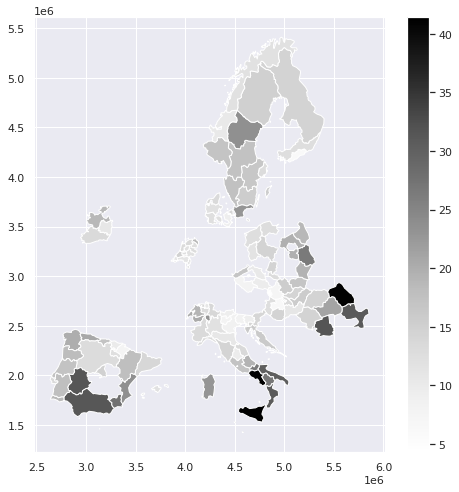

In [49]:
eu_risk.plot(column='risk', legend="True", figsize=(8,8), cmap='Greys')

Quite a lot of data seems to be missing from the map. However, some concluisons can already be made. Some parts in the South and East of EU are at higher risk of poverty. For example Sicily, and parts of Romania are particularly vunerable. Next map looks at more complete data of road accident deaths by NUTS_2 regions. This data is more complete, but size of the regions seems to contribute significantly to the number of victims.

In [50]:
road = pd.read_excel('/content/EU_data_Road_Victims.xlsx')
road.head()

,NUTS_co,NUTS_name,nbr_dead
0,BE,Belgium,604
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,21
2,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...,21
3,BE2,Vlaams Gewest,310
4,BE21,Prov. Antwerpen,63


In [51]:
eu_road = eu.merge(road, left_on='NUTS_ID', right_on='NUTS_co', how='left', validate="one_to_one")
eu_road.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,NUTS_co,NUTS_name,nbr_dead
0,CZ05,2,CZ,Severovýchod,Severovýchod,0.0,NaN,0,CZ05,"POLYGON ((4710986.851 3088955.848, 4729795.896...",CZ05,Severovýchod,82.0
1,CZ06,2,CZ,Jihovýchod,Jihovýchod,0.0,NaN,0,CZ06,"POLYGON ((4715869.727 2986862.871, 4782782.205...",CZ06,Jihovýchod,104.0
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,NaN,0,CZ07,"POLYGON ((4929608.184 2955255.716, 4924768.599...",CZ07,Strední Morava,66.0
3,CZ08,2,CZ,Moravskoslezsko,Moravskoslezsko,0.0,NaN,0,CZ08,"POLYGON ((4895030.487 3026304.289, 4917489.492...",CZ08,Moravskoslezsko,63.0
4,DE11,2,DE,Stuttgart,Stuttgart,0.0,NaN,0,DE11,"POLYGON ((4327060.365 2936754.230, 4329577.592...",DE11,Stuttgart,157.0


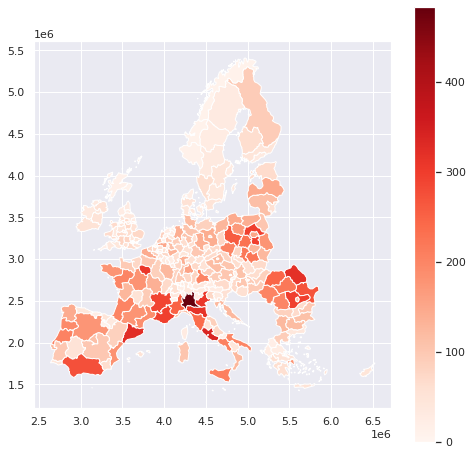

In [52]:
eu_road.plot(column='nbr_dead', legend="True", figsize=(8,8), cmap='Reds')

Seems there are some very bad drivers in Italy, numbers support the stereotypes in this case. Adding a basemap with the road network might be more informative.

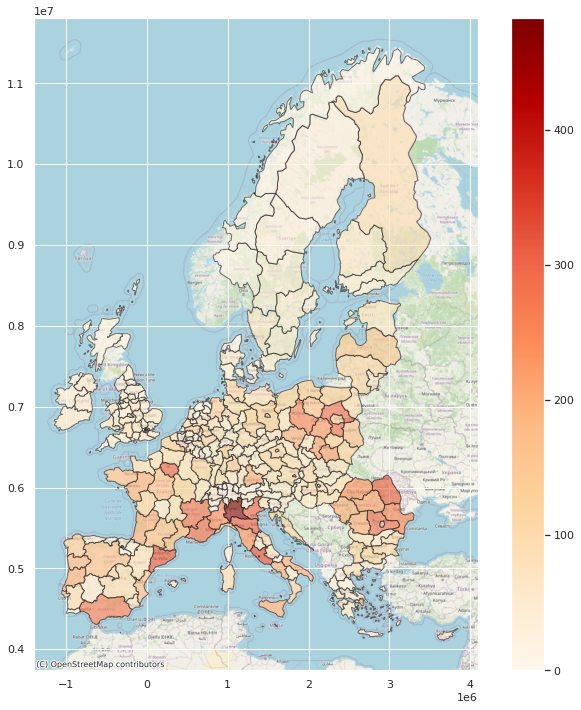

In [54]:
eu_road = eu_road.to_crs(epsg=3857)

ax = eu_road.plot(column='nbr_dead', legend="True", alpha=0.6, figsize=(12,12), cmap='OrRd', edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


#**Portfolio exercise 4 - Network Analysis in Python**
Wednesday, 2021-11-24


In [ ]:
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools
import networkx as nx
import community.community_louvain as community_louvain

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show


# Default figure size
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

The data

In [57]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

In [58]:
print(nx.info(G_friendship))
print(nx.info(G_advice))
print(nx.info(G_work))

DiGraph with 71 nodes and 575 edges
DiGraph with 71 nodes and 892 edges
DiGraph with 71 nodes and 756 edges


Calcuating dimensional centralities

In [59]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [60]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [61]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [62]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [63]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [64]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

Calculating Assortiativity

In [65]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:261: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)


nan

In [66]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:261: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)


nan

In [67]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:261: RuntimeWarning: invalid value encountered in double_scalars
  r = (t - s) / (1 - s)


nan

Calculating Reciprocity

reciprocity for the Friendship network

In [68]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

reciprocity for the work network

In [69]:
nx.overall_reciprocity(G_work)

1.0

the number here is quite different, and the reciprocity facotr is very high. it is possible to speculate that this is that the work network is based on very concrete and objective connections between th eindividuals. Work can be seen as a dialogue, two way collaboration where reciprocity is high between individuals. 

In [70]:
nx.overall_reciprocity(G_advice)

0.3923766816143498

We can observe a very low reciprocity factor, this could be due to the fact that advice is ussualy conencted to some hierarchical relationships between individuals in a work place. this means many times is is one-directional, which would suggest low reciprocity between individual nodes. In other workds, this hierarchical relationship causes the edges of the network to be very low in reciprocity.

Community detection - identifying communities in Friendship and Advice networks

In [71]:
G_fr = nx.from_pandas_adjacency(mat_friendship, create_using=nx.Graph)
G_adv = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)

In [72]:
print(nx.info(G_fr))
print(nx.info(G_adv))

Graph with 71 nodes and 399 edges
Graph with 71 nodes and 717 edges


In [73]:
com1 = community_louvain.best_partition(G_fr)
com2 = community_louvain.best_partition(G_adv)

In [74]:
print(max(com1.values()))
print(max(com2.values()))

5
2


In [75]:
nx.set_node_attributes(G_fr, com1, 'community')

g_plot = hv.Graph.from_networkx(G_fr, G_layout).opts(tools=['hover'],
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [76]:
nx.set_node_attributes(G_adv, com2, 'community')

g_plot = hv.Graph.from_networkx(G_adv, G_layout).opts(tools=['hover'],
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

#**Portfolio excercise 5 - Natural Language Processing**
Wednesday, 2021-11-24

Detecting fake Elon Tweets using surepvised ML

In [ ]:
!pip -q install eli5 #installing a great package for explaining ML models

In [78]:
import pandas as pd 
import numpy as np
import eli5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
elon = pd.read_csv('/content/find_elon.gz')
elon = elon.rename(columns={'0': 'tweet', '1':'real'})
elon.head(40)

# boolean values meaning: 1 - True, 0 - False

,tweet,real
0,@WhatsupFranks @lexfridman NPCs all the way up,1
1,We’ll only do one or two at a time. @S_Padival...,0
2,@Erdayastronaut @SpaceX SN4 with F9 engine is ...,0
3,@LarryKellogg @arctechinc The Tesla FSD comput...,1
4,@brainwipe There would def be millions of agen...,1
5,"@teslaownersSV Well, back to work …",1
6,China’s progress in advanced infrastructure is...,1
7,"@JaneidyEve @ds23ytube Long-term, there will b...",1
8,to transport goods across vast distances &amp;...,0
9,"@joshgolson Exactly, I don’t want to hear thos...",0


In [82]:
X = elon['tweet'].values
y = elon['real'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [84]:
vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [85]:
model = LogisticRegression(max_iter=3000)

In [86]:
model.fit(X_train_vec_1, y_train)

LogisticRegression(max_iter=3000)

In [88]:
X_test_vec_1 = vectorizer.transform(X_test)

In [89]:
model.score(X_test_vec_1, y_test)

0.8431061806656102

In [91]:
y_pred = model.predict(X_test_vec_1)

In [92]:
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,270,53
1,46,262


TF - IDF

In [93]:
vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=3000)

In [ ]:
model.fit(X_train_vec_2, y_train)

In [101]:
X_test_vec_2 = vectorizer.transform(X_test)

In [102]:
model.score(X_test_vec_2, y_test)

0.8399366085578447

In [103]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['real','fake'], top=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
eli5.show_prediction(model, X_test[38], vec=vectorizer, target_names=['real','fake'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
import spacy
nlp = spacy.load("en")

In [106]:
doc = nlp(X_test[2])

In [107]:
[(tok.text, tok.pos_) for tok in doc]

[('rules', 'NOUN'),
 (',', 'PUNCT'),
 ('logistics', 'NOUN'),
 (',', 'PUNCT'),
 ('etc', 'X'),
 ('.', 'PUNCT')]